# IMPORTS

In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

# DATA ESPLORATION
1. Load the data file and explore the data, showing size, data descriptions, data distributions with boxplot, and correlation between columns

In [306]:
df = pd.read_csv('03-01-23.csv')
print(f"dataset dimensions are {df.shape[0]},{df.shape[1]}")

dataset dimensions are 1000,11


In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X00     1000 non-null   float64
 1   X01     1000 non-null   float64
 2   X02     1000 non-null   float64
 3   X03     1000 non-null   float64
 4   X04     1000 non-null   float64
 5   X05     1000 non-null   float64
 6   X06     1000 non-null   float64
 7   X07     1000 non-null   float64
 8   X08     1000 non-null   float64
 9   X09     1000 non-null   float64
 10  y       1000 non-null   float64
dtypes: float64(11)
memory usage: 86.1 KB


In [308]:
df.head()

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,y
0,-0.016771,-0.026036,-0.001474,0.104545,0.352163,0.023372,0.003706,0.004963,-0.007113,0.022166,3.288439
1,-0.011618,0.025699,-0.026818,0.053014,0.613195,-0.012447,0.029382,-0.006348,-0.036920,-0.016464,-2.333510
2,0.027478,0.009282,-0.020700,0.630085,0.612415,-0.004157,0.008240,0.019062,0.010821,-0.012983,2.259783
3,-0.003170,-0.001697,-0.028924,0.389900,0.000182,0.027526,0.012792,-0.021192,-0.011102,0.015352,2.939127
4,-0.039508,-0.009104,0.021215,0.951426,0.778600,0.018246,-0.000294,-0.012900,0.004178,0.014846,1.623948


In [309]:
df.describe()

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,y
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.000127,0.000297,-0.000421,3.378287e-01,2.521912e-01,0.000364,-0.000191,0.000553,0.000130,0.000524,0.437747
std,0.023475,0.018878,0.019124,2.952473e-01,2.877240e-01,0.017402,0.019349,0.017783,0.018999,0.025391,2.407762
min,-0.074550,-0.055749,-0.063489,9.531015e-07,6.913766e-10,-0.054694,-0.058531,-0.054578,-0.062925,-0.073059,-6.609545
25%,-0.015763,-0.012357,-0.013722,6.778294e-02,1.552023e-02,-0.011251,-0.013393,-0.011797,-0.012001,-0.018202,-1.200759
50%,0.000446,0.000269,-0.000891,2.638645e-01,1.218160e-01,0.000675,-0.000333,0.000422,-0.000858,-0.000219,0.336424
75%,0.015529,0.013924,0.012571,5.712697e-01,4.295876e-01,0.012217,0.012797,0.012697,0.012722,0.018642,2.175038
max,0.079599,0.073114,0.052593,9.996939e-01,9.988956e-01,0.053673,0.051803,0.049480,0.061867,0.081461,7.915506


In [310]:
df.corr()

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,y
X00,1.000000,0.170854,-0.395194,-0.043222,-0.023247,-0.275844,0.280314,0.243400,-0.325324,-0.153477,0.227594
X01,0.170854,1.000000,-0.308342,0.015840,-0.059226,0.102338,0.047167,0.086368,0.009363,-0.268953,0.170725
X02,-0.395194,-0.308342,1.000000,0.028499,0.036766,-0.266042,-0.326706,0.043103,0.195065,0.112824,-0.287004
X03,-0.043222,0.015840,0.028499,1.000000,-0.049209,0.008271,0.011157,-0.006028,0.029519,-0.006292,-0.005415
X04,-0.023247,-0.059226,0.036766,-0.049209,1.000000,-0.018662,-0.048011,-0.002504,-0.006653,0.042886,0.002213
X05,-0.275844,0.102338,-0.266042,0.008271,-0.018662,1.000000,0.119608,-0.292621,0.115454,0.021566,0.369986
X06,0.280314,0.047167,-0.326706,0.011157,-0.048011,0.119608,1.000000,-0.228867,0.054893,-0.274311,0.376340
X07,0.243400,0.086368,0.043103,-0.006028,-0.002504,-0.292621,-0.228867,1.000000,-0.145627,-0.132451,-0.056175
X08,-0.325324,0.009363,0.195065,0.029519,-0.006653,0.115454,0.054893,-0.145627,1.000000,-0.316079,0.209655
X09,-0.153477,-0.268953,0.112824,-0.006292,0.042886,0.021566,-0.274311,-0.132451,-0.316079,1.000000,0.374650


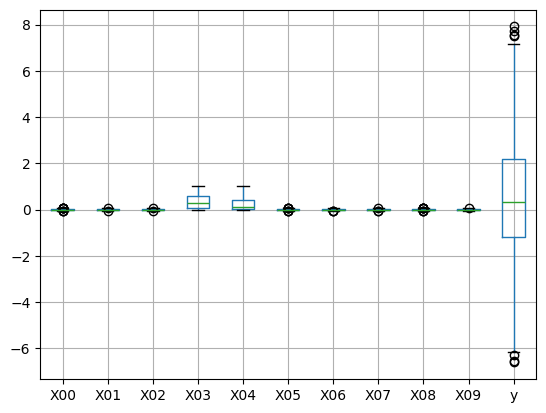

In [311]:
df.boxplot()
plt.show()

2. Comment the exploration of step 1 pointing out if there are predicting columns having the absolute value of correlation with the target less than 0.15

The following columns has a correlation value less than 0.15
- X02
- X03
- X04
- X07

There are no missing values

# LINEAR REGRESSION TRAINING
3. train test a multivariate linear regressor and show the Root Mean Squared Error

## UTILITY FUNCTION

In [312]:
def quick_train(estimator,X_train,y_train,X_test,y_test):
    estimator.fit(X_train,y_train)
    y_pred=estimator.predict(X_test)
    rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
    return y_pred, rmse

In [313]:
# DATASET SPLIT
target='y'
X= df.drop(columns=target)
y= df[target]
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [314]:
y_pred,rmse=quick_train(LinearRegression(),X_train,y_train,X_test,y_test)
print("the root mean square error is {:.2f}".format(rmse))

the root mean square error is 0.88


4. train test a multivariate linear regressor on the reduced dataset obtained dropping the columns loosely correlated with the target, and show the Root Mean Squared Error

In [315]:
# drop columns with low correlation with target
X_train_optimal=X_train.drop(columns=['X02','X03','X04','X07'])
X_test_optimal=X_test.drop(columns=['X02','X03','X04','X07'])

In [316]:
y_pred,rmse=quick_train(LinearRegression(),X_train_optimal,y_train,X_test_optimal,y_test)
print("the root mean square error is {:.2f}".format(rmse))

the root mean square error is 1.02


5. train and test on the reduced dataset a decision tree regressor, and show the Root Mean Squared Error

In [317]:
y_pred,rmse=quick_train(DecisionTreeRegressor(),X_train_optimal,y_train,X_test_optimal,y_test)
print("the root mean square error is {:.2f}".format(rmse))

the root mean square error is 2.08


6. optimise the depth of the decision tree regressor of step 5 searching for the minimum Root Mean Squared Error with cross-validation, and show the best RMSE

In [318]:
score='neg_mean_squared_error'
params={'max_depth':range(10,60,10)}
gsv=GridSearchCV(DecisionTreeRegressor(),param_grid=params,scoring=score)
gsv.fit(X_train_optimal,y_train)
y_pred=gsv.predict(X_test_optimal)
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
print("the root mean square error is {:.2f}".format(rmse))

the root mean square error is 2.08


7. Comment the results

The elimination of colums with low correlation with target generate an increase on the RMSE value, which is strange  